<a href="https://colab.research.google.com/github/ylm19/Data_analysis_practice_Limmy/blob/main/004_mobike%E7%94%A8%E6%88%B7%E5%88%86%E7%BE%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 案例背景
摩拜单车，英文名mobike,是由胡玮炜创办的北京摩拜科技有限公司研发的互联网短途出行解决方案，是无桩借还车模式的智能硬件。人们通过智能手机就能快速租用和归还一辆摩拜单车，用可负担的价格来完成一次几公里的市内骑行。摩拜单车经过专业设计，将全铝车身，防爆轮胎，轴传动等高科技手段集于一体，使其坚固耐用，进而降低维护成本。定制的单车外形在街头有较高的辨识度，车身内集成了嵌入式芯片，GPS模块和SIM卡，便于摩拜监控自行车在路上的具体位置。

本案例基于所给数据，利用Python数据进行聚类分析，对摩拜单车的使用者进行分群。

# 数据字典

* user_id	用户编码
* start_time	开始时间
* end_time	结束时间
* timeduration	骑行时长
* bikeid	自行车编码
* tripduration	骑行距离
* from_station_id	开始站编码
* from_station_name	开始站名字
* to_station_id	结束站编码
* to_station_name	结束站名字
* usertype	用户种类
* gender	性别
* birthyear	出生年份
* age	年龄


# 1.数据概况分析

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
mobike = pd.read_csv('/content/mobike.csv')
mobike.head()

,Unnamed: 0,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear,age
0,439283,21499218,11/14/2018 7:37,11/14/2018 7:44,7,2631,436,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,1982.0,37
1,603317,21694389,12/18/2018 19:02,12/18/2018 19:10,7,1565,445,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,1988.0,31
2,109957,21110722,10/9/2018 12:37,10/9/2018 12:55,18,2231,"1,090",163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,1989.0,30
3,428082,21485409,11/12/2018 12:30,11/12/2018 12:40,9,4226,581,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,1989.0,30
4,395437,21445994,11/7/2018 7:29,11/7/2018 7:35,6,3475,390,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,1979.0,40


In [ ]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6427 non-null   int64  
 1   user_id            6427 non-null   int64  
 2   start_time         6427 non-null   object 
 3   end_time           6427 non-null   object 
 4   timeduration       6427 non-null   int64  
 5   bikeid             6427 non-null   int64  
 6   tripduration       6427 non-null   object 
 7   from_station_id    6427 non-null   int64  
 8   from_station_name  6427 non-null   object 
 9   to_station_id      6427 non-null   int64  
 10  to_station_name    6427 non-null   object 
 11  usertype           6427 non-null   object 
 12  gender             5938 non-null   object 
 13  birthyear          5956 non-null   float64
 14  age                6427 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 753.3+ KB


In [ ]:
mobike.isnull().sum()

Unnamed: 0             0
user_id                0
start_time             0
end_time               0
timeduration           0
bikeid                 0
tripduration           0
from_station_id        0
from_station_name      0
to_station_id          0
to_station_name        0
usertype               0
gender               489
birthyear            471
age                    0
dtype: int64

In [ ]:
mobike.describe()

,Unnamed: 0,user_id,timeduration,bikeid,from_station_id,to_station_id,birthyear
count,6427.000000,6.427000e+03,6427.000000,6427.000000,6427.000000,6427.000000,5956.000000
mean,317005.228411,2.135519e+07,11.778902,3491.637934,195.038432,198.502567,1982.488583
std,184583.896111,2.181294e+05,9.692236,1912.171846,148.170025,148.939873,11.147859
min,51.000000,2.098358e+07,0.000000,2.000000,2.000000,2.000000,1906.000000
25%,159093.000000,2.116805e+07,5.000000,1852.000000,77.000000,80.000000,1977.000000
50%,314569.000000,2.135114e+07,9.000000,3618.000000,168.000000,172.000000,1986.000000
75%,476273.500000,2.154376e+07,15.000000,5179.500000,287.000000,287.000000,1991.000000
max,642522.000000,2.174223e+07,59.000000,6470.000000,662.000000,661.000000,2002.000000


## 数据概况：

该数据共有6427条，其中:

(1) user_id、from_station_id、to_station_id显示为int64，但其为用户编码，应为类别型变量(str);


In [ ]:
mobike['user_id']=mobike['user_id'].astype(str)
mobike['from_station_id']=mobike['from_station_id'].astype(str)
mobike['to_station_id']=mobike['to_station_id'].astype(str)

(2) 无意义字段unnamed:0,需删除。

In [ ]:
mobike=mobike.drop(['Unnamed: 0'],axis=1)

(3) age显示为object，应为类别int64；

In [ ]:
mobike['age'].unique()

array(['37', '31', '30', '40', '25', '48', ' ', '28', '27', '34', '33',
       '26', '20', '23', '55', '22', '54', '52', '57', '29', '39', '51',
       '32', '49', '43', '58', '42', '61', '35', '41', '63', '50', '38',
       '36', '44', '62', '19', '59', '45', '46', '56', '21', '24', '47',
       '66', '64', '77', '69', '60', '68', '70', '53', '113', '73', '18',
       '67', '65', '71', '79', '17', '101', '74', '72'], dtype=object)

In [ ]:
mobike=mobike.replace(to_replace=' ',value=np.nan)

In [ ]:
mobike['age']=mobike['age'].fillna(mobike['age'].median())

In [ ]:
mobike['age']=mobike['age'].astype(int)

(4) gender、birthyear两个数据维度存在空值；

In [ ]:
mobike['gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
mobike['gender']=mobike['gender'].fillna('unknown')

In [ ]:
# 剔除无用变量 birthyear与age重复
mobike.drop(['birthyear'],axis=1,inplace=True)

(5) start_time、end_time显示为类别型变量(object),但其分别为开始时间和结束时间，则应将其处理成日期时间格式；

In [ ]:
mobike['start_time']=pd.to_datetime(mobike['start_time'])
mobike['end_time']=pd.to_datetime(mobike['end_time'])

In [ ]:
mobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6427 entries, 0 to 6426
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            6427 non-null   object        
 1   start_time         6427 non-null   datetime64[ns]
 2   end_time           6427 non-null   datetime64[ns]
 3   timeduration       6427 non-null   int64         
 4   bikeid             6427 non-null   int64         
 5   tripduration       6427 non-null   object        
 6   from_station_id    6427 non-null   object        
 7   from_station_name  6427 non-null   object        
 8   to_station_id      6427 non-null   object        
 9   to_station_name    6427 non-null   object        
 10  usertype           6427 non-null   object        
 11  gender             6427 non-null   object        
 12  age                6427 non-null   int64         
dtypes: datetime64[ns](2), int64(3), object(8)
memory usage: 652.9+ 

In [ ]:
mobike.describe()

,timeduration,bikeid,age
count,6427.000000,6427.000000,6427.000000
mean,11.778902,3491.637934,36.254084
std,9.692236,1912.171846,10.770489
min,0.000000,2.000000,17.000000
25%,5.000000,1852.000000,29.000000
50%,9.000000,3618.000000,33.000000
75%,15.000000,5179.500000,41.000000
max,59.000000,6470.000000,113.000000


# 2. 单变量分析
## 2.1 性别

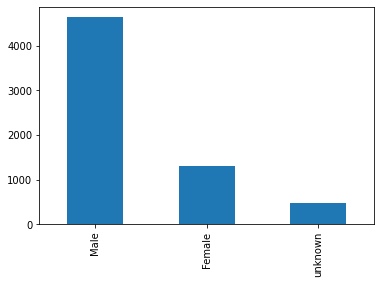

In [ ]:
mobike['gender'].value_counts().plot(kind='bar')

In [ ]:
mobike['gender'].value_counts(1)

Male       0.721487
Female     0.202427
unknown    0.076085
Name: gender, dtype: float64

结论1：摩拜单车用户中，男性用户占比最高，是女性的三倍。

## 2.2 年龄

In [ ]:
age = mobike['age'].unique()
print(sorted(age))

[17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 77, 79, 101, 113]


In [ ]:
# 选择年龄合适的数据进行分析，筛选出16-80岁的数据
mobike = mobike[mobike['age']<=80]
mobike = mobike[mobike['age']>=16]

In [ ]:
bins=[16,20,30,40,50,60,70,80]
mobike['age_group']=pd.cut(mobike['age'],bins)

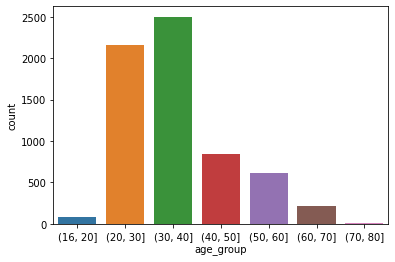

In [ ]:
sns.countplot(x='age_group',data=mobike)

结论2：用户年龄集中于20-40之间

## 2.3 日期

In [ ]:
mobike['start_time'].dt.year.unique()

array([2018])

In [ ]:
mobike['end_time'].dt.year.unique()

array([2018])

In [ ]:
from datetime import datetime

In [ ]:
mobike['weekname']=mobike['start_time'].dt.day_name()
mobike['weekname'].value_counts()

Tuesday      1145
Wednesday    1103
Monday       1072
Thursday     1039
Friday        911
Saturday      622
Sunday        532
Name: weekname, dtype: int64

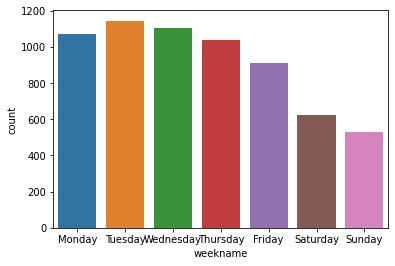

In [ ]:
sns.countplot(x='weekname',data=mobike,order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

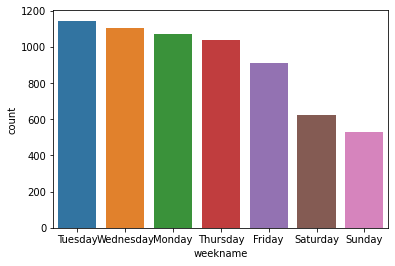

In [ ]:
sns.countplot(x='weekname',data=mobike,order=mobike['weekname'].value_counts().index)

用户倾向于工作日使用摩拜，用户多为上班族

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


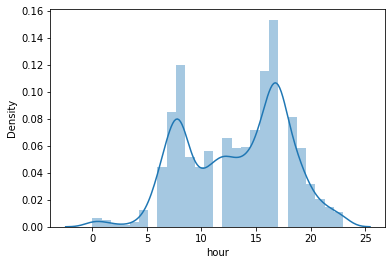

In [ ]:
mobike['hour']=mobike['start_time'].dt.hour
sns.distplot(mobike['hour'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


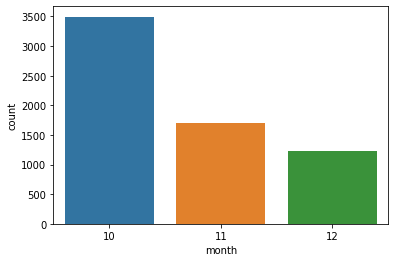

In [ ]:
mobike['month']=mobike['start_time'].dt.month
sns.countplot(mobike['month'])

结论3：用户使用时间集中在10月，11,12月使用数量递减，这与天气转凉有关；一周内骑行集中在工作日，骑行时间点集中在上下班高峰时段，分别是8点、7点，16点，17点

## 2.4 骑行时长

In [ ]:
mobike['timeduration'].unique()

array([ 7, 18,  9,  6, 12,  8, 22, 13,  3, 16,  4, 14, 27, 55,  5, 42, 20,
       31, 15, 11,  2, 24, 10, 17, 37, 35, 26, 30,  1, 23, 40, 33, 36, 29,
       38, 59, 21, 34, 25, 46, 53, 19, 58, 57, 39, 56, 28, 44, 52, 32, 43,
       54, 50, 51, 41, 48, 45, 49, 47,  0])

In [ ]:
time = mobike['timeduration'].unique()
print(sorted(time))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


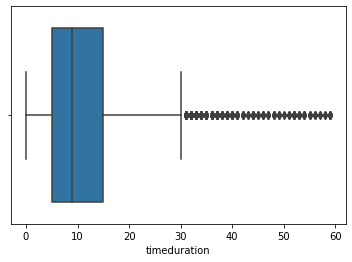

In [ ]:
sns.boxplot(mobike['timeduration'])

In [ ]:
t_bins=[0,10,20,30,40,50,60]
mobike['timeduration_group']=pd.cut(mobike['timeduration'],bins)

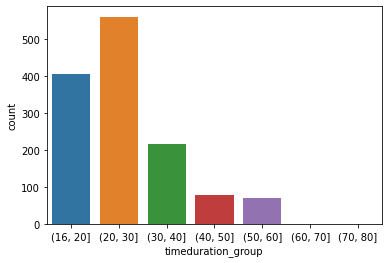

In [ ]:
sns.countplot(x='timeduration_group',data=mobike)

结论4：用户骑行时间集中在16-30分钟之间。

## 2.5 骑行距离

In [ ]:
mobike['tripduration'].unique()

array(['436', '445', '1,090', ..., '1,369', '1,458', '174'], dtype=object)

In [ ]:
mobike['tripduration']= mobike['tripduration'].str.replace(',','').astype(float)

In [ ]:
trip = mobike['tripduration'].unique()
print(sorted(trip))

[61.0, 67.0, 74.0, 78.0, 80.0, 82.0, 83.0, 85.0, 89.0, 92.0, 93.0, 94.0, 95.0, 97.0, 98.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 108.0, 110.0, 111.0, 112.0, 113.0, 114.0, 116.0, 117.0, 118.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 151.0, 152.0, 153.0, 154.0, 155.0, 156.0, 157.0, 158.0, 159.0, 160.0, 161.0, 162.0, 163.0, 164.0, 165.0, 166.0, 167.0, 168.0, 169.0, 170.0, 171.0, 172.0, 173.0, 174.0, 175.0, 176.0, 177.0, 178.0, 179.0, 180.0, 181.0, 182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189.0, 190.0, 191.0, 192.0, 193.0, 194.0, 195.0, 196.0, 197.0, 198.0, 199.0, 200.0, 201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207.0, 208.0, 209.0, 210.0, 211.0, 212.0, 213.0, 214.0, 215.0, 216.0, 217.0, 218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224.0, 225.0, 226.0, 227.0, 228.0, 229.0, 230.0, 231.0, 232.0, 233.0, 234.0, 235.0, 236.0,

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


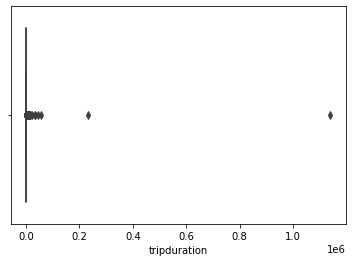

In [ ]:
sns.boxplot(mobike['tripduration'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


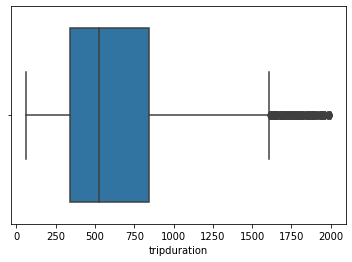

In [ ]:
mobike=mobike[mobike['tripduration']<=2000]
sns.boxplot(mobike['tripduration'])

结论5： 用户骑行距离大多在一公里以内

## 2.6 用户类别

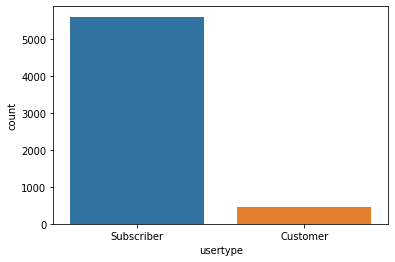

In [ ]:
sns.countplot(x='usertype',data=mobike,order=mobike['usertype'].value_counts().index)

In [ ]:
mobike['usertype'].value_counts(1)

Subscriber    0.92403
Customer      0.07597
Name: usertype, dtype: float64

结论6：用户类型89%都是订阅用户，说明此品牌的单车用户粘性是很高的。

# 3. 模型建立

剔除无用变量'start_time', 'end_time'与'timeduration'重复，'user_id','bikeid','from_station_id'无用，'from_station_name'，'to_station_name'与'tripduration'重复，'to_station_id'无用

In [ ]:
mobike.head()

,user_id,start_time,end_time,timeduration,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,age,age_group,weekname,hour,month,timeduration_group
0,21499218,2018-11-14 07:37:00,2018-11-14 07:44:00,7,2631,436.0,319,Greenview Ave & Diversey Pkwy,67,Sheffield Ave & Fullerton Ave,Subscriber,Male,37,"(30, 40]",Wednesday,7,11,NaN
1,21694389,2018-12-18 19:02:00,2018-12-18 19:10:00,7,1565,445.0,164,Franklin St & Lake St,195,Columbus Dr & Randolph St,Subscriber,Male,31,"(30, 40]",Tuesday,19,12,NaN
2,21110722,2018-10-09 12:37:00,2018-10-09 12:55:00,18,2231,1090.0,163,Damen Ave & Clybourn Ave,69,Damen Ave & Pierce Ave,Customer,Male,30,"(20, 30]",Tuesday,12,10,"(16.0, 20.0]"
3,21485409,2018-11-12 12:30:00,2018-11-12 12:40:00,9,4226,581.0,226,Racine Ave & Belmont Ave,308,Seeley Ave & Roscoe St,Subscriber,Female,30,"(20, 30]",Monday,12,11,NaN
4,21445994,2018-11-07 07:29:00,2018-11-07 07:35:00,6,3475,390.0,77,Clinton St & Madison St,621,Aberdeen St & Randolph St,Subscriber,Male,40,"(30, 40]",Wednesday,7,11,NaN


In [ ]:
mobike.columns

Index(['user_id', 'start_time', 'end_time', 'timeduration', 'bikeid',
       'tripduration', 'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name', 'usertype', 'gender', 'age', 'age_group', 'weekname',
       'hour', 'month', 'timeduration_group'],
      dtype='object')

In [ ]:
mobike.drop(['user_id', 'start_time', 'end_time', 'bikeid', 'from_station_id', 'from_station_name', 'to_station_id',
       'to_station_name','age_group','timeduration_group','hour', 'month' ],axis=1,inplace=True)
mobike=pd.get_dummies(mobike)

In [ ]:
mobike.corr()[['tripduration']].sort_values('tripduration',ascending=False)

,tripduration
tripduration,1.000000
timeduration,0.999074
usertype_Customer,0.271146
gender_unknown,0.245876
weekname_Sunday,0.055389
weekname_Saturday,0.042369
age,0.026194
gender_Female,0.021640
weekname_Tuesday,0.011452
weekname_Monday,0.002532


In [ ]:
mobike_5=mobike[['timeduration','usertype_Customer','usertype_Subscriber','gender_Female','gender_Male']]
from sklearn.preprocessing import scale
x=pd.DataFrame(scale(mobike_5))

In [ ]:
from sklearn import cluster
model=cluster.KMeans(n_clusters=3,random_state=10)
model.fit(x)

KMeans(n_clusters=3, random_state=10)

In [ ]:
mobike_5['cluster']=model.labels_

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
mobike_5.groupby(['cluster'])['timeduration'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4390.0,9.555125,6.346388,1.0,5.0,8.0,13.0,33.0
1,460.0,16.660870,7.976148,3.0,10.0,16.0,23.0,33.0
2,1205.0,10.330290,6.544033,1.0,5.0,9.0,14.0,33.0


In [ ]:
mobike_5.groupby(['cluster'])['usertype_Customer'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4390.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,460.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
2,1205.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
mobike_5.groupby(['cluster'])['gender_Female'].describe()

,count,mean,std,min,25%,50%,75%,max
cluster,,,,,,,,
0,4390.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0
1,460.0,0.082609,0.27559,0.0,0.0,0.0,0.0,1.0
2,1205.0,1.000000,0.00000,1.0,1.0,1.0,1.0,1.0


In [ ]:
from sklearn import metrics#调用sklearn的metrics库
x_cluster=model.fit_predict(x)#个体与群的距离
score=metrics.silhouette_score(x,x_cluster)#评分越高，个体与群越近；评分越低，个体与群越远
print(score) 

0.716841150053588


In [ ]:
centers=pd.DataFrame(model.cluster_centers_)

In [ ]:
centers.columns=['timeduration','usertype_Customer','usertype_Subscriber','gender_Female','gender_Male']
print(centers)

   timeduration  usertype_Customer  usertype_Subscriber  gender_Female  \
0     -0.102331          -0.286734             0.286734      -0.508245   
1      0.945281           3.487556            -3.487556      -0.303722   
2      0.011953          -0.286734             0.286734       1.967557   

   gender_Male  
0     0.582299  
1    -1.129638  
2    -1.690174  


In [ ]:
mobike_5['cluster'].value_counts(1)

0    0.725021
2    0.199009
1    0.075970
Name: cluster, dtype: float64

In [ ]:
centers.to_csv('monike_users.csv')

# 4. 业务建议
（1） 单车的用户人群广泛分布于校园，或者刚出校园的年轻男性工作者，可以在校园中推广骑行活动，通过该群体人数规模大的优势进行品牌宣传扩大品牌影响力。

（2） 0群用户以男性为主，骑行市场较长，可以针对这部分人群实行时长兑换商品积分的活动，与线上商城达成商务合作，刺激购买欲望。

（3） 1群代表女性、骑行时间较短的会员用户，可以向此类用户推广包月活动。

（4） 2群的用户骑行时间短，可推断为主要是临时性需求的用户，可以向此类人群推广加入会员优惠活动，增加此类用户粘性。